In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.9 MB/s eta 0:00:00


In [ ]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix , precision_score , recall_score , f1_score , accuracy_score
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
import torch

stopwords = set(stopwords.words("english"))
from transformers import AutoModelForSequenceClassification , AutoTokenizer
from transformers import Trainer , TrainingArguments , AutoModel , BertTokenizer , DistilBertForSequenceClassification

os.environ["WANDB_MODE"] = "offline"

import warnings
warnings.filterwarnings("ignore")

### Project Overview: Fine-Tuning DistilBERT for Emotion Recognition using HuggingFace

This project focuses on fine-tuning **DistilBERT**, a lightweight and efficient variant of the popular BERT model, for the task of **emotion recognition** from text. The goal is to classify textual data into one of several emotion categories (e.g., sadness, anger, love, joy) using the HuggingFace Transformers library. The dataset provided contains text samples labeled with corresponding emotions, making it suitable for supervised learning.

---

### Key Components of the Project

1. **Objective**:
   - Develop a model capable of accurately predicting emotions from textual input.
   - Leverage the power of pre-trained language models (DistilBERT) and fine-tune them for the specific task of emotion classification.

2. **Dataset**:
   - The dataset consists of **16,000 text samples**, each labeled with one of the following emotions: **sadness, anger, love, joy**.
   - Example:
     - Text: *"i didnt feel humiliated"* → Emotion: **sadness**
     - Text: *"i feel strong and good overall"* → Emotion: **joy**

3. **Model**:
   - **DistilBERT**: A distilled version of BERT, offering similar performance with fewer parameters, making it faster and more efficient.
   - Pre-trained on large corpora, DistilBERT is fine-tuned on the emotion recognition dataset to adapt it to the specific task.

4. **Tools and Frameworks**:
   - **HuggingFace Transformers**: Provides pre-trained models, tokenizers, and training utilities.
   - **PyTorch**: Used as the backend for model training and evaluation.
   - **Datasets Library**: For efficient data loading and preprocessing.

5. **Workflow**:
   - **Data Preprocessing**:
     - Tokenize text inputs using DistilBERT's tokenizer.
     - Convert text and labels into input IDs, attention masks, and label tensors.
   - **Model Fine-Tuning**:
     - Load the pre-trained DistilBERT model.
     - Add a classification head for emotion prediction.
     - Train the model on the labeled dataset using a suitable loss function (e.g., cross-entropy).
   - **Evaluation**:
     - Assess model performance on a validation set using metrics like accuracy, precision, recall, and F1-score.
   - **Inference**:
     - Deploy the fine-tuned model to predict emotions for new, unseen text inputs.

6. **Challenges**:
   - Handling imbalanced emotion classes in the dataset.
   - Ensuring the model generalizes well to unseen data and avoids overfitting.
   - Managing computational resources efficiently, especially when fine-tuning large models.

7. **Expected Outcomes**:
   - A high-performing emotion recognition model capable of accurately classifying text into predefined emotion categories.
   - Insights into the effectiveness of DistilBERT for emotion recognition tasks.

---

### Summary

This project demonstrates the process of fine-tuning **DistilBERT** for **emotion recognition** using the **HuggingFace Transformers library**. By leveraging a labeled dataset of text samples, the model is trained to classify emotions such as sadness, anger, love, and joy. The workflow involves data preprocessing, model fine-tuning, evaluation, and deployment. The use of DistilBERT ensures a balance between performance and efficiency, making it suitable for real-world applications. The final model can be integrated into systems requiring emotion analysis, such as chatbots, sentiment analysis tools, or mental health monitoring applications.

---

### Key Takeaways
- **DistilBERT** is an efficient and effective choice for emotion recognition tasks.
- Fine-tuning pre-trained models on domain-specific data significantly improves performance.
- HuggingFace provides a robust ecosystem for implementing and deploying transformer-based models.
- Emotion recognition has practical applications in enhancing human-computer interaction and understanding user sentiment.

================================================================================

### Code Overview: Loading and Preprocessing a Text File for Emotion Recognition

This Python script is designed to load and preprocess a text file containing labeled data for an emotion recognition task. The file is expected to have a specific format where each line contains a text sample and its corresponding emotion label, separated by a semicolon (`;`). The script uses the `pandas` library to handle the data and performs basic preprocessing to structure it into a DataFrame for further analysis or model training.

---

### Key Components of the Code

1. **File Path**:
   - The script starts by defining the file path (`path`) where the dataset is stored. The path points to a text file named `six emotion.txt` located in a specific folder on Google Drive.

2. **File Existence Check**:
   - The script checks if the file exists at the specified path using `os.path.exists(path)`. This ensures that the program does not attempt to load a non-existent file, which would result in an error.

3. **Loading and Preprocessing**:
   - If the file exists, it is loaded into a pandas DataFrame using `pd.read_csv()`.
     - The `sep="\t"` parameter indicates that the file is tab-separated.
     - The `names=["raw_text"]` parameter assigns a column name to the loaded data.
   - The `raw_text` column is then split into two separate columns (`text` and `target`) using the `str.split(';', expand=True)` method. This assumes that the text and label in each line are separated by a semicolon.
   - The original `raw_text` column is dropped using `df.drop()` to clean up the DataFrame.

4. **Output**:
   - If the file is successfully loaded and processed, the script prints `"Successfully loaded file."`
   - If the file is not found, it prints `"File not found."`

---

### Summary

This script is a **data loading and preprocessing utility** designed to prepare a text dataset for an emotion recognition task. It performs the following steps:
1. Specifies the file path and checks if the file exists.
2. Loads the file into a pandas DataFrame.
3. Splits the raw text into two columns: `text` (the input data) and `target` (the emotion label).
4. Cleans up the DataFrame by removing the original raw text column.
5. Provides feedback on whether the file was successfully loaded or not.

The resulting DataFrame (`df`) is structured with two columns:
- `text`: Contains the input text samples.
- `target`: Contains the corresponding emotion labels.

This structured data is now ready for further preprocessing, exploration, or use in training a machine learning model for emotion recognition.

---

### Example Output
If the input file (`six emotion.txt`) contains the following data:
```
I feel happy;joy
I am so angry;anger
This is amazing;love
```

The resulting DataFrame (`df`) will look like this:

| text               | target |
|--------------------|--------|
| I feel happy       | joy    |
| I am so angry      | anger  |
| This is amazing    | love   |

---

### Key Takeaways
- The script is robust and includes error handling to check for file existence.
- It efficiently structures raw text data into a clean, machine-learning-ready format.
- The use of pandas makes it easy to manipulate and preprocess the data.
- This preprocessing step is critical for downstream tasks like model training and evaluation in emotion recognition projects.

In [ ]:
path = r"/content/drive/MyDrive/مجلد بلا عنوان/six emotion.txt"


if os.path.exists(path) :
  df = pd.read_csv(path, sep="\t", names=["raw_text"])
  df[['text', 'target']] = df['raw_text'].str.split(';', expand=True)
  df = df.drop('raw_text', axis=1)
  print("Successfully loaded file.")


else:
  print("File not found.")

Successfully loaded file.


In [ ]:
df.head(10)

,text,target
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


The code `df["target"].value_counts()` provides a summary of the distribution of values in the `"target"` column of a DataFrame (`df`). Here's a concise overview:

1. **Purpose**:  
   - It counts the occurrences of each unique value in the `"target"` column.

2. **Output**:  
   - Returns a Series where:
     - **Index**: Unique values from the `"target"` column.
     - **Values**: Counts of each unique value.

3. **Use Case**:  
   - Useful for understanding the distribution of categorical or discrete data, such as class labels in classification tasks.

4. **Example**:  
   If `df["target"]` contains `[0, 1, 1, 0, 1, 2]`, the output might look like:
   ```
   1    3
   0    2
   2    1
   Name: target, dtype: int64
   ```

5. **Key Insight**:  
   - Helps identify class imbalance or the frequency of specific categories in the dataset.

This is a quick and efficient way to analyze the target variable in a dataset.

In [ ]:
df["target"].value_counts()

,count
target,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


The function `check_missing_values(df)` is designed to analyze a DataFrame (`df`) and identify missing values. Here's a concise summary of its functionality:

---

### **Overview of `check_missing_values(df)`**

1. **Purpose**:  
   - To check for missing (null) values in each column of the DataFrame.

2. **How It Works**:  
   - `df.isnull()` creates a Boolean DataFrame where `True` indicates a missing value and `False` indicates a non-missing value.
   - `.sum()` aggregates the `True` values (missing values) column-wise, providing the total count of missing values for each column.

3. **Output**:  
   - Returns a Series where:
     - **Index**: Column names of the DataFrame.
     - **Values**: Count of missing values in each column.

4. **Use Case**:  
   - Essential for data cleaning and preprocessing to identify columns with missing data before further analysis or modeling.

5. **Example**:  
   If `df` has the following data:
   ```
   A     B     C
   1     NaN   3
   NaN   4     NaN
   2     5     6
   ```
   The output will be:
   ```
   A    1
   B    1
   C    1
   dtype: int64
   ```

6. **Key Insight**:  
   - Helps in deciding how to handle missing data (e.g., imputation, dropping rows/columns).

---

This function is a quick and efficient way to assess data quality in a DataFrame.

In [ ]:
def check_missing_values(df):
  return df.isnull().sum()


In [ ]:
check_missing_values(df)

,0
text,0
target,0


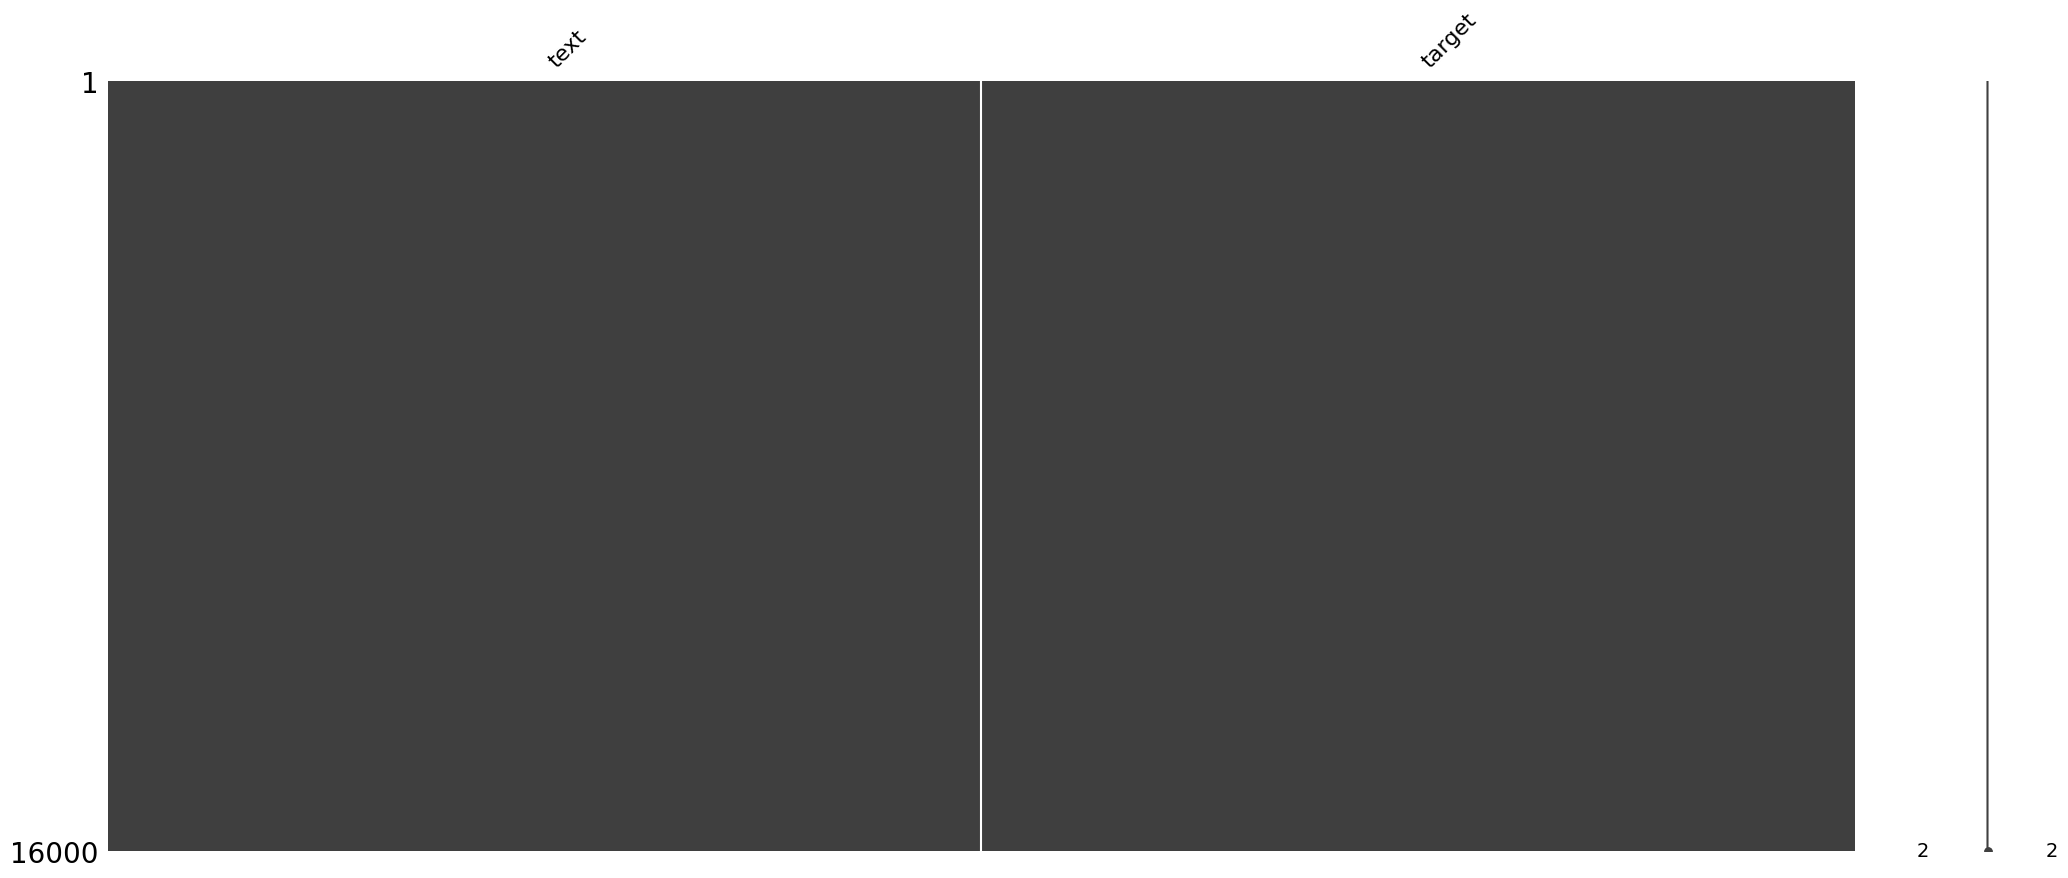

In [ ]:
mis.matrix(df)
plt.show()

In [ ]:
## Checking for any empty strings within the text column
df["text"].str.isspace().sum()

0

In [ ]:
df.describe(include="all").T

,count,unique,top,freq
text,16000,15969,im still not sure why reilly feels the need to...,2
target,16000,6,joy,5362


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   target  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


This code generates and displays a **Word Cloud** visualization based on text data from a DataFrame column (`df["text"]`). Here's a concise breakdown of its functionality:

---

### **Overview of the Code**

1. **Word Cloud Creation**:
   - `WordCloud()` initializes a Word Cloud object with the following parameters:
     - `width=600`, `height=400`: Dimensions of the Word Cloud image.
     - `random_state=101`: Ensures reproducibility of the Word Cloud layout.
     - `background_color='white'`: Sets the background color of the Word Cloud.
   - `.generate(" ".join(df["text"]))`: Combines all text entries in the `df["text"]` column into a single string and generates the Word Cloud based on word frequencies.

2. **Displaying the Word Cloud**:
   - `plt.figure(figsize=(15, 10))`: Sets the size of the plot for better visualization.
   - `plt.imshow(wc, interpolation='bilinear')`: Renders the Word Cloud image with smooth interpolation.
   - `plt.title()`: Adds a title to the plot with custom styling (font size, weight, color, and padding).
   - `plt.axis('off')`: Hides the axes for a cleaner visualization.
   - `plt.show()`: Displays the Word Cloud.

---

### **Key Insights**
- **Purpose**: Visualizes the most frequent words in the `df["text"]` column, with larger words indicating higher frequency.
- **Use Case**: Useful for text analysis, such as identifying common themes or keywords in a dataset.
- **Customization**: Parameters like `background_color`, `width`, `height`, and `random_state` allow for tailored visualizations.

---

### **Example Output**
A Word Cloud image will be displayed, with words like "data," "analysis," and "machine" appearing larger if they are more frequent in the `df["text"]` column.

This code is a powerful tool for exploratory data analysis (EDA) on text data.

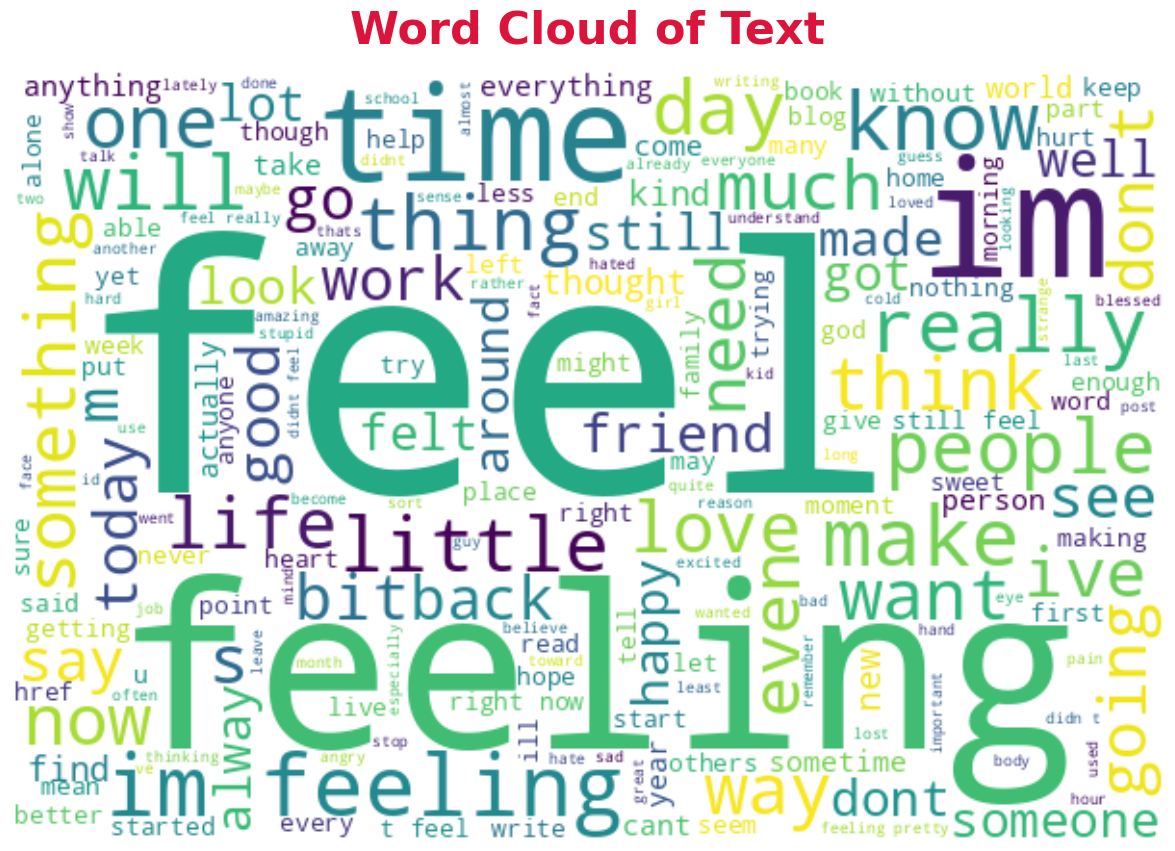

In [ ]:
wc = WordCloud(width=600, height=400, random_state=101, background_color='white').generate(" ".join(df["text"]))

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud of Text', fontsize=32, fontweight='bold', color='crimson', pad=20)
plt.axis('off')
plt.show()

# Preprocessing¶

### Code Overview: Text Preprocessing and Feature Engineering

This Python script defines a **text preprocessing function** and applies it to a DataFrame containing text data. The preprocessing function cleans and normalizes the text, and additional features such as text length are computed. The cleaned text and derived features are stored in new columns in the DataFrame for further analysis or model training.

---

### Key Components of the Code

1. **Preprocessing Function**:
   - The function `preprocessing(text)` performs the following steps:
     1. **Lowercasing**: Converts the text to lowercase to ensure uniformity.
     2. **Removing Punctuation**: Uses a regular expression (`re.sub("[^\w\s]", "", text)`) to remove all non-alphanumeric characters (e.g., commas, periods, exclamation marks).
     3. **Removing Numbers**: Uses another regular expression (`re.sub(r"\d+", "", text)`) to remove numeric digits.
     4. **Tokenization**: Splits the text into individual words using `split()`.
     5. **Stopword Removal**: Filters out stopwords (common words like "the", "is", "and") using a list comprehension. Note: The `stopwords` list is assumed to be predefined elsewhere in the code.
     6. **Joining Words**: Combines the filtered words back into a single string using `" ".join(words)`.

   - The cleaned text is returned as the output of the function.

2. **Applying Preprocessing**:
   - The preprocessing function is applied to the `text` column of the DataFrame using `df["text"].apply(preprocessing)`.
   - The cleaned text is stored in a new column called `cleaned_text`.

3. **Feature Engineering**:
   - Two additional features are created:
     1. **Text Length**: The length of the original text (in characters) is computed using `df["text"].apply(len)` and stored in a new column called `text_length`.
     2. **Cleaned Text Length**: The length of the cleaned text (in characters) is computed using `df["cleaned_text"].apply(len)` and stored in a new column called `cleaned_text_length`.

---

### Summary

This script performs **text preprocessing** and **feature engineering** on a DataFrame containing text data. The preprocessing steps include:
- Lowercasing
- Removing punctuation and numbers
- Tokenization
- Stopword removal

The cleaned text is stored in a new column (`cleaned_text`), and two additional features (`text_length` and `cleaned_text_length`) are computed to capture the length of the original and cleaned text, respectively.

---

### Example Input and Output

#### Input DataFrame (`df`):
| text                     | target |
|--------------------------|--------|
| I feel happy!            | joy    |
| I am so angry 123.       | anger  |
| This is amazing!!!       | love   |

#### Output DataFrame (`df`):
| text                     | target | cleaned_text       | text_length | cleaned_text_length |
|--------------------------|--------|--------------------|-------------|---------------------|
| I feel happy!            | joy    | feel happy         | 13          | 10                  |
| I am so angry 123.       | anger  | angry              | 17          | 5                   |
| This is amazing!!!       | love   | amazing            | 17          | 7                   |

---

### Key Takeaways
- The preprocessing function standardizes and cleans text data, making it more suitable for NLP tasks.
- Stopword removal reduces noise and focuses on meaningful words.
- Feature engineering (e.g., text length) provides additional insights and can improve model performance.
- The use of `apply()` makes it easy to process each row of the DataFrame efficiently.
- This preprocessing step is essential for tasks like sentiment analysis, emotion recognition, or text classification.

---

### Potential Improvements
1. **Expand Stopwords**: Ensure the `stopwords` list is comprehensive and relevant to the dataset.
2. **Stemming/Lemmatization**: Add stemming or lemmatization to reduce words to their base forms (e.g., "running" → "run").
3. **Handling Contractions**: Expand contractions (e.g., "don't" → "do not") for better text normalization.
4. **Error Handling**: Add error handling to the preprocessing function to manage unexpected inputs (e.g., empty strings).

In [ ]:
def preprocessing(text) :
  text = text.lower()
  text = re.sub("[^\w\s]" , "" , text)  # Remove all Punctuation like ==> .,!?:;
  text = re.sub(r"\d+" , "" , text)   # Removes all digits (numbers) from the text

  words = text.split()

  words = [w for w in words if w not in stopwords]

  preprocessing = " ".join(words)

  return preprocessing

df["cleaned_text"] = df["text"].apply(preprocessing)

df["text_length"] = df["text"].apply(len)

df["cleaned_text_length"] = df["cleaned_text"].apply(len)

In [ ]:
df.head(10)

,text,target,cleaned_text,text_length,cleaned_text_length
0,i didnt feel humiliated,sadness,didnt feel humiliated,23,21
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,108,61
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong,48,41
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,92,52
4,i am feeling grouchy,anger,feeling grouchy,20,15
5,ive been feeling a little burdened lately wasn...,sadness,ive feeling little burdened lately wasnt sure,65,45
6,ive been taking or milligrams or times recomme...,surprise,ive taking milligrams times recommended amount...,122,96
7,i feel as confused about life as a teenager or...,fear,feel confused life teenager jaded year old man,73,46
8,i have been with petronas for years i feel tha...,joy,petronas years feel petronas performed well ma...,98,60
9,i feel romantic too,love,feel romantic,19,13


This code creates a **distribution plot** (histogram with a Kernel Density Estimate (KDE) curve) to visualize the distribution of text lengths in a DataFrame column (`df["text_length"]`). Here's a concise breakdown of its functionality:

---

### **Overview of the Code**

1. **Setting Plot Size**:
   - `sns.set(rc={'figure.figsize': (12, 8)})`: Configures the default figure size for all subsequent plots to `12x8` inches.

2. **Creating the Distribution Plot**:
   - `sns.displot(df["text_length"], kde=True)`:
     - `df["text_length"]`: The column containing the lengths of text entries.
     - `kde=True`: Overlays a KDE curve on the histogram to show the smoothed distribution of the data.
     - By default, `displot()` creates a histogram with bins automatically determined.

3. **Adding a Title**:
   - `plt.title()`: Adds a title to the plot with custom styling:
     - `"Distribution Plot of Text Length"`: Title text.
     - `fontsize=15`: Font size of the title.
     - `color="magenta"`: Title color.
     - `fontweight='bold'`: Makes the title bold.

4. **Displaying the Plot**:
   - `plt.show()`: Renders and displays the plot.

---

### **Key Insights**
- **Purpose**: Visualizes the distribution of text lengths (e.g., word counts or character counts) in the dataset.
- **Use Case**: Helps identify patterns, such as common text lengths, outliers, or skewness in the data.
- **Customization**: The `kde=True` parameter adds a smooth curve for better interpretation of the distribution.

---

### **Example Output**
A histogram with a KDE curve will be displayed, showing the frequency of different text lengths. For example:
- If most text lengths are around 50–100, the histogram will peak in that range.
- The KDE curve will provide a smooth representation of the distribution.

This code is useful for exploratory data analysis (EDA) on text data, especially when understanding the variability in text length is important.

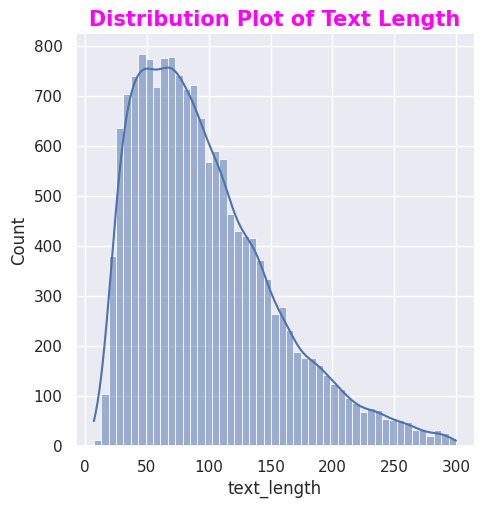

In [ ]:
sns.set(rc={'figure.figsize': (12, 8)})

sns.displot(df["text_length"], kde=True)

plt.title("Distribution Plot of Text Length", fontsize=15, color="magenta", fontweight='bold')

plt.show()

This code creates a **distribution plot** (histogram with a Kernel Density Estimate (KDE) curve) to visualize the distribution of cleaned text lengths in a DataFrame column (`df["cleaned_text_length"]`). Here's a concise breakdown of its functionality:

---

### **Overview of the Code**

1. **Setting Plot Size**:
   - `sns.set(rc={'figure.figsize': (12, 8)})`: Configures the default figure size for all subsequent plots to `12x8` inches.

2. **Creating the Distribution Plot**:
   - `sns.displot(df["cleaned_text_length"], kde=True)`:
     - `df["cleaned_text_length"]`: The column containing the lengths of cleaned text entries (e.g., after removing stopwords, punctuation, or other preprocessing steps).
     - `kde=True`: Overlays a KDE curve on the histogram to show the smoothed distribution of the data.
     - By default, `displot()` creates a histogram with bins automatically determined.

3. **Adding a Title**:
   - `plt.title()`: Adds a title to the plot with custom styling:
     - `"Distribution Plot of Cleaned Text Length"`: Title text.
     - `fontsize=15`: Font size of the title.
     - `color="magenta"`: Title color.
     - `fontweight='bold'`: Makes the title bold.

4. **Displaying the Plot**:
   - `plt.show()`: Renders and displays the plot.

---

### **Key Insights**
- **Purpose**: Visualizes the distribution of cleaned text lengths (e.g., word counts or character counts after preprocessing) in the dataset.
- **Use Case**: Helps identify patterns, such as common text lengths, outliers, or skewness in the cleaned data.
- **Customization**: The `kde=True` parameter adds a smooth curve for better interpretation of the distribution.

---

### **Example Output**
A histogram with a KDE curve will be displayed, showing the frequency of different cleaned text lengths. For example:
- If most cleaned text lengths are around 30–80, the histogram will peak in that range.
- The KDE curve will provide a smooth representation of the distribution.

This code is useful for exploratory data analysis (EDA) on cleaned text data, especially when understanding the variability in text length after preprocessing is important.

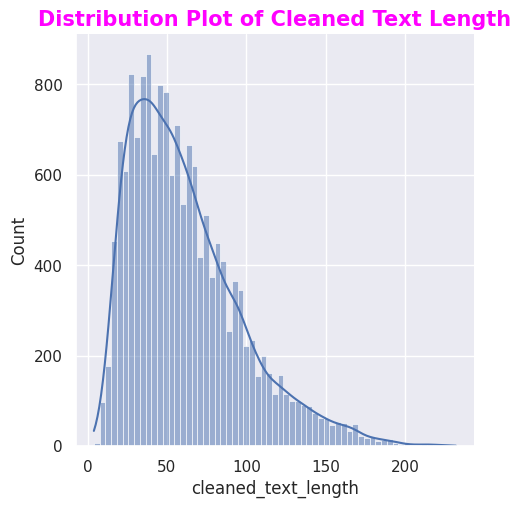

In [ ]:
sns.set(rc={'figure.figsize': (12, 8)})

sns.displot(df["cleaned_text_length"], kde=True)

plt.title("Distribution Plot of Cleaned Text Length", fontsize=15, color="magenta", fontweight='bold')

plt.show()

This code extracts the unique emotion labels and their corresponding counts from the `"target"` column of a DataFrame (`df`). Here's a concise breakdown of its functionality:

---

### **Overview of the Code**

1. **Extracting Emotion Labels**:
   - `df["target"].value_counts().index`:
     - `df["target"]`: Accesses the `"target"` column, which contains emotion labels.
     - `.value_counts()`: Counts the occurrences of each unique emotion label.
     - `.index`: Retrieves the unique emotion labels (e.g., `["happy", "sad", "angry"]`).

2. **Extracting Counts for Each Emotion**:
   - `df["target"].value_counts().values`:
     - `.values`: Retrieves the counts of each emotion label (e.g., `[100, 50, 30]`).

3. **Result**:
   - `emotions`: A list or array of unique emotion labels.
   - `values`: A list or array of counts corresponding to each emotion label.

---

### **Key Insights**
- **Purpose**: Extracts the distribution of emotion labels in the `"target"` column.
- **Use Case**: Useful for understanding the frequency of each emotion in the dataset, which can help in tasks like:
  - Identifying class imbalance.
  - Visualizing the distribution of emotions (e.g., using bar plots).
  - Preparing data for machine learning models.

---

### **Example**
If `df["target"]` contains:
```
["happy", "sad", "happy", "angry", "sad", "happy"]
```

The output will be:
- `emotions`: `["happy", "sad", "angry"]`
- `values`: `[3, 2, 1]`

---

### **Next Steps**
You can use `emotions` and `values` to:
1. Create visualizations (e.g., bar plots, pie charts).
2. Analyze class imbalance and apply techniques like oversampling or undersampling.
3. Prepare data for training machine learning models.

This code is a fundamental step in exploratory data analysis (EDA) for emotion classification tasks.

In [ ]:
emotions = df["target"].value_counts().index  # Emotion labels
values = df["target"].value_counts().values  # Counts for each emotion


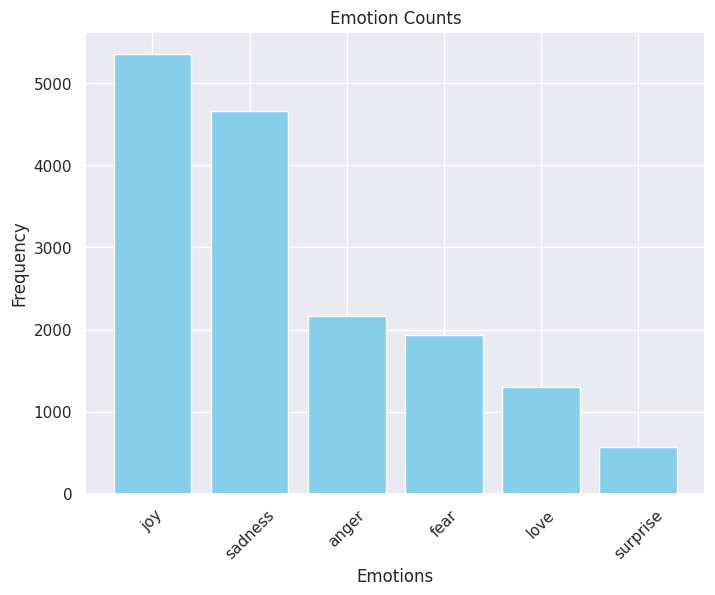

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(emotions, values, color='skyblue')

plt.title('Emotion Counts')
plt.xlabel('Emotions')
plt.ylabel('Frequency')

plt.xticks(rotation=45)
plt.show()

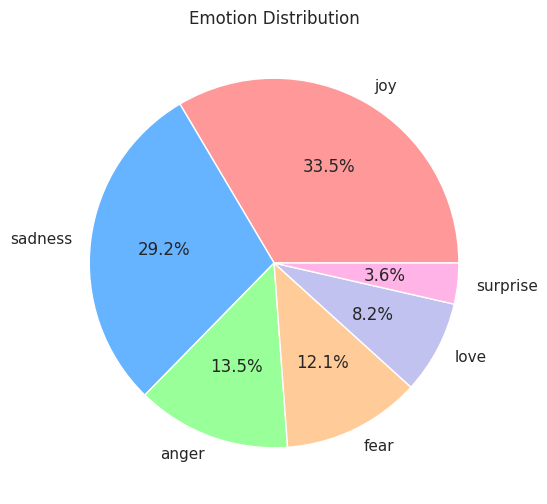

In [ ]:
plt.figure(figsize=(8, 6))

plt.pie(values, labels=emotions, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])

# Title
plt.title('Emotion Distribution')

# Show plot
plt.show()

In [ ]:
X = df["cleaned_text"]
y = df["target"]

In [ ]:
num_classes = len(df["target"].unique())
num_classes

6

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print(f"X Train Shape is = {X_train.shape}")
print(f"X Test Shape is = {X_test.shape}")
print(f"y Train Shape is = {y_train.shape}")
print(f"y Test Shape is = {y_test.shape}")

X Train Shape is = (12800,)
X Test Shape is = (3200,)
y Train Shape is = (12800,)
y Test Shape is = (3200,)


In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
y_train

array([2, 4, 3, ..., 4, 4, 0])

In [ ]:
max([len(i) for i in df["text"]]) # List Comprehension

300

# Tokenizer

This code performs **tokenization** using the **DistilBERT tokenizer** for an emotion recognition task. It tokenizes the training (`X_train`) and testing (`X_test`) text data into a format suitable for input into a DistilBERT model. Here's a concise breakdown of its functionality:

---

### **Overview of the Code**

1. **Model and Tokenizer Setup**:
   - `model_name = "distilbert-base-uncased"`: Specifies the pre-trained DistilBERT model to use.
   - `tok = AutoTokenizer.from_pretrained(model_name)`: Loads the tokenizer associated with the DistilBERT model.

2. **Tokenizing Training Data**:
   - `train_encodings = tok(list(X_train), padding=True, truncation=True, return_tensors="pt", max_length=512)`:
     - `list(X_train)`: Converts the training text data into a list (if not already in list format).
     - `padding=True`: Pads sequences to the same length.
     - `truncation=True`: Truncates sequences longer than `max_length`.
     - `return_tensors="pt"`: Returns tokenized outputs as PyTorch tensors.
     - `max_length=512`: Sets the maximum sequence length to 512 tokens (the limit for BERT-based models).

3. **Tokenizing Testing Data**:
   - `test_encodings = tok(list(X_test), padding=True, truncation=True, return_tensors="pt", max_length=512)`:
     - Applies the same tokenization process to the testing data (`X_test`).

---

### **Key Insights**
- **Purpose**: Converts raw text data into tokenized inputs that can be fed into a DistilBERT model for emotion recognition.
- **Use Case**: Essential for preparing text data for training or inference with transformer-based models like DistilBERT.
- **Parameters**:
  - `padding`: Ensures all sequences have the same length for batch processing.
  - `truncation`: Prevents sequences from exceeding the model's maximum input length.
  - `return_tensors="pt"`: Ensures compatibility with PyTorch.

---

### **Output**
- `train_encodings`: A dictionary containing tokenized training data, including:
  - `input_ids`: Token IDs for the input sequences.
  - `attention_mask`: Mask indicating which tokens are actual words and which are padding.
- `test_encodings`: A dictionary containing tokenized testing data in the same format.

---

### **Example**
If `X_train` contains:
```
["I feel happy", "I am sad"]
```

The `train_encodings` output might look like:
```python
{
  "input_ids": tensor([[101, 1045, 2215, 3407, 102, 0, 0, ...], [101, 1045, 2572, 2870, 102, 0, 0, ...]]),
  "attention_mask": tensor([[1, 1, 1, 1, 1, 0, 0, ...], [1, 1, 1, 1, 1, 0, 0, ...]])
}
```

---

### **Next Steps**
- Use `train_encodings` and `test_encodings` as inputs to a DistilBERT model for training or evaluation.
- Combine with labels (`y_train`, `y_test`) for supervised learning tasks like emotion classification.

This code is a critical step in preparing text data for transformer-based models in NLP tasks.

In [ ]:
# Tokenization using distilbert tokenizer for emotion recognition
# CLS # SEP

model_name = "distilbert-base-uncased"

tok = AutoTokenizer.from_pretrained(model_name)

train_encodings = tok(list(X_train) , padding = True , truncation = True , return_tensors = "pt" , max_length = 512)

test_encodings = tok(list(X_test) , padding = True , truncation = True  , return_tensors = "pt" , max_length = 512)

This code converts the tokenized data (`train_encodings` and `test_encodings`) and their corresponding labels (`y_train` and `y_test`) into a **Dataset format**, which is commonly used for training and evaluating machine learning models, especially in PyTorch. Here's a concise breakdown of its functionality:

---

### **Overview of the Code**

1. **Creating Training Dataset**:
   - `df_train = Dataset.from_dict({...})`:
     - `input_ids`: Token IDs from `train_encodings["input_ids"]`, representing the tokenized input sequences.
     - `attention_mask`: Attention masks from `train_encodings["attention_mask"]`, indicating which tokens are actual words and which are padding.
     - `labels`: Converts `y_train` (training labels) into a PyTorch tensor of type `torch.long` (required for classification tasks).

2. **Creating Testing Dataset**:
   - `df_test = Dataset.from_dict({...})`:
     - Similar to the training dataset, but uses `test_encodings` and `y_test` (testing labels).

---

### **Key Insights**
- **Purpose**: Converts tokenized data and labels into a structured Dataset format for easy integration with PyTorch models and training pipelines.
- **Use Case**: Essential for preparing data for training and evaluation in NLP tasks like emotion recognition.
- **Dataset Format**:
  - Contains three key components:
    1. `input_ids`: Tokenized input sequences.
    2. `attention_mask`: Masks for distinguishing actual tokens from padding.
    3. `labels`: Ground truth labels for supervised learning.

---

### **Example Output**
If `train_encodings` and `y_train` are:
```python
train_encodings = {
    "input_ids": tensor([[101, 1045, 2215, 3407, 102, 0, 0], [101, 1045, 2572, 2870, 102, 0, 0]]),
    "attention_mask": tensor([[1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0]])
}
y_train = [0, 1]  # Labels for the training data
```

The `df_train` Dataset will look like:
```python
Dataset({
    "input_ids": tensor([[101, 1045, 2215, 3407, 102, 0, 0], [101, 1045, 2572, 2870, 102, 0, 0]]),
    "attention_mask": tensor([[1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0]]),
    "labels": tensor([0, 1])
})
```

---

### **Next Steps**
- Use `df_train` and `df_test` with PyTorch `DataLoader` to create batches for training and evaluation.
- Feed the data into a model (e.g., DistilBERT) for training or inference.

This code is a crucial step in preparing data for NLP tasks using PyTorch and transformer-based models.

In [ ]:
# # Convert to Dataset format


df_train = Dataset.from_dict({
    "input_ids": train_encodings["input_ids"],
    "attention_mask": train_encodings["attention_mask"],
    "labels": torch.tensor(y_train, dtype=torch.long)  # Convert labels to Tensor
})

df_test = Dataset.from_dict({
    "input_ids": test_encodings["input_ids"],
    "attention_mask": test_encodings["attention_mask"],
    "labels": torch.tensor(y_test, dtype=torch.long)  # Convert labels to Tensor
})

# Fine Tuning distilbert

This code sets up and fine-tunes a **DistilBERT model** for a **sequence classification task** (e.g., emotion recognition) using the Hugging Face `Trainer` API. Here's a concise breakdown of its functionality:

---

### **Overview of the Code**

1. **Model Initialization**:
   - `DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=num_classes)`:
     - Loads the pre-trained DistilBERT model for sequence classification.
     - `num_labels=num_classes`: Specifies the number of output classes (e.g., emotions).

2. **Training Arguments**:
   - `TrainingArguments(...)`:
     - Configures hyperparameters and training settings, such as:
       - `output_dir="./results"`: Directory to save model checkpoints.
       - `learning_rate=2e-5`: Learning rate for fine-tuning.
       - `per_device_train_batch_size=16`, `per_device_eval_batch_size=16`: Batch sizes for training and evaluation.
       - `num_train_epochs=5`: Number of training epochs.
       - `weight_decay=0.01`: L2 regularization.
       - `logging_dir="./logs"`: Directory for logs.
       - `warmup_steps=500`: Learning rate warmup steps.
       - `load_best_model_at_end=True`: Loads the best model at the end of training.
       - `metric_for_best_model="eval_loss"`: Uses evaluation loss to determine the best model.
       - `gradient_accumulation_steps=2`: Accumulates gradients over 2 steps before updating weights.
       - `report_to="none"`: Disables logging to external services like WandB.

3. **Custom Collate Function**:
   - `collate_fn(batch)`:
     - Converts a batch of data into PyTorch tensors for `input_ids`, `attention_mask`, and `labels`.

4. **Metrics Computation**:
   - `compute_metrics(eval_pred)`:
     - Computes evaluation metrics (accuracy, precision, recall, F1 score) using `sklearn` functions.

5. **Trainer Initialization**:
   - `Trainer(...)`:
     - Combines the model, training arguments, datasets, and metrics into a single training pipeline.
     - `train_dataset=df_train`: Training dataset.
     - `eval_dataset=df_test`: Evaluation dataset.
     - `compute_metrics=compute_metrics`: Function to compute evaluation metrics.
     - `data_collator=collate_fn`: Custom collate function for batching.

6. **Fine-Tuning**:
   - `trainer.train()`: Starts the fine-tuning process.

---

### **Key Insights**
- **Purpose**: Fine-tunes a DistilBERT model for a sequence classification task (e.g., emotion recognition).
- **Use Case**: Ideal for NLP tasks where text data needs to be classified into predefined categories.
- **Customization**:
  - Hyperparameters like learning rate, batch size, and epochs can be adjusted.
  - Metrics like accuracy, precision, recall, and F1 score are computed for evaluation.

---

### **Example Workflow**
1. **Input**: Tokenized datasets (`df_train`, `df_test`) and labels (`y_train`, `y_test`).
2. **Output**: A fine-tuned DistilBERT model saved in `./results`, with evaluation metrics logged in `./logs`.

---

### **Next Steps**
- Evaluate the fine-tuned model on unseen data.
- Deploy the model for inference in production.
- Experiment with different hyperparameters or architectures for better performance.

This code provides a complete pipeline for fine-tuning a transformer-based model for sequence classification tasks.

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased" , num_labels = num_classes)

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_steps=10,
    logging_dir="./logs",
    lr_scheduler_type="linear",
    warmup_steps=500,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    save_total_limit=3,
    gradient_accumulation_steps=2 ,
    report_to="none"  # Disables WandB logging
)


# Collator Function
def collate_fn(batch):
    return {
        "input_ids": torch.tensor([item["input_ids"] for item in batch], dtype=torch.long),
        "attention_mask": torch.tensor([item["attention_mask"] for item in batch], dtype=torch.long),
        "labels": torch.tensor([item["labels"] for item in batch], dtype=torch.long)
    }



def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    preds = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=df_train,
    eval_dataset=df_test,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,

)

# Fine-tuning the model
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.577500,0.496521,0.858437,0.862244,0.858437,0.848244
2,0.247000,0.189368,0.928750,0.929455,0.928750,0.928585
3,0.128100,0.166320,0.932187,0.934955,0.932187,0.932669
4,0.075000,0.167232,0.931562,0.931435,0.931562,0.931277
5,0.071300,0.161050,0.931875,0.932456,0.931875,0.931607


TrainOutput(global_step=2000, training_loss=0.3693582150042057, metrics={'train_runtime': 448.4653, 'train_samples_per_second': 142.709, 'train_steps_per_second': 4.46, 'total_flos': 1192291633152000.0, 'train_loss': 0.3693582150042057, 'epoch': 5.0})

# Save and Load Model and Tokenizer

This code saves the fine-tuned **DistilBERT model**, its **tokenizer**, and the **label encoder** for future use. It also demonstrates how to reload these components for inference or further training. Here's a concise breakdown of its functionality:

---

### **Overview of the Code**

1. **Saving the Fine-Tuned Model**:
   - `trainer.save_model("Saved_Emotion_Recognition_DistilBERT")`:
     - Saves the fine-tuned DistilBERT model to the directory `"Saved_Emotion_Recognition_DistilBERT"`.

2. **Saving the Tokenizer**:
   - `tok.save_pretrained("Saved_Emotion_Recognition_DistilBERT")`:
     - Saves the tokenizer to the same directory as the model.

3. **Saving the Label Encoder**:
   - `pickle.dump(label_encoder, open("label_encoder.pkl", "wb"))`:
     - Serializes and saves the `label_encoder` object (used for encoding emotion labels) to a file named `"label_encoder.pkl"`.

4. **Reloading the Model**:
   - `model = DistilBertForSequenceClassification.from_pretrained("Saved_Emotion_Recognition_DistilBERT")`:
     - Loads the saved fine-tuned model from the directory.

5. **Reloading the Tokenizer**:
   - `tok = AutoTokenizer.from_pretrained("Saved_Emotion_Recognition_DistilBERT")`:
     - Loads the saved tokenizer from the same directory.

6. **Reloading the Label Encoder**:
   - `label_encoder = pickle.load(open("label_encoder.pkl", "rb"))`:
     - Deserializes and loads the `label_encoder` object from the `"label_encoder.pkl"` file.

---

### **Key Insights**
- **Purpose**: Saves and reloads all components required for inference or further training:
  - Fine-tuned model.
  - Tokenizer.
  - Label encoder.
- **Use Case**: Essential for deploying the model in production or resuming training/evaluation later.

---

### **Example Workflow**
1. **Saving**:
   - After fine-tuning, the model, tokenizer, and label encoder are saved to disk.
   - Example directory structure:
     ```
     Saved_Emotion_Recognition_DistilBERT/
       ├── pytorch_model.bin
       ├── config.json
       ├── tokenizer.json
       └── ...
     label_encoder.pkl
     ```

2. **Reloading**:
   - The saved components are reloaded for inference or further use:
     ```python
     model = DistilBertForSequenceClassification.from_pretrained("Saved_Emotion_Recognition_DistilBERT")
     tok = AutoTokenizer.from_pretrained("Saved_Emotion_Recognition_DistilBERT")
     label_encoder = pickle.load(open("label_encoder.pkl", "rb"))
     ```

---

### **Next Steps**
- Use the reloaded model, tokenizer, and label encoder for:
  - **Inference**: Predicting emotions on new text data.
  - **Further Training**: Continuing fine-tuning with additional data.
  - **Deployment**: Integrating the model into an application or API.

This code ensures that all components of the emotion recognition pipeline are preserved and can be easily reused.

In [ ]:
trainer.save_model("Saved_Emotion_Recognition_DistilBERT")

tok.save_pretrained("Saved_Emotion_Recognition_DistilBERT")

import pickle

pickle.dump(label_encoder , open("label_encoder.pkl" , "wb"))

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained("Saved_Emotion_Recognition_DistilBERT")

tok = AutoTokenizer.from_pretrained("Saved_Emotion_Recognition_DistilBERT")

label_encoder = pickle.load(open("label_encoder.pkl" , "rb"))


# Model Evaluation¶


In [ ]:
pred , labels , metrics = trainer.predict(df_test)

y_pred = np.argmax(pred , axis=1)

In [ ]:
cm = confusion_matrix(y_pred , y_test)
cm

array([[401,  14,   3,   0,  17,   0],
       [  9, 366,   2,   0,  12,  29],
       [  3,   0, 963,  35,   5,   4],
       [  1,   0,  45, 260,   0,   0],
       [ 13,  12,   5,   1, 912,   0],
       [  0,   5,   3,   0,   0,  80]])

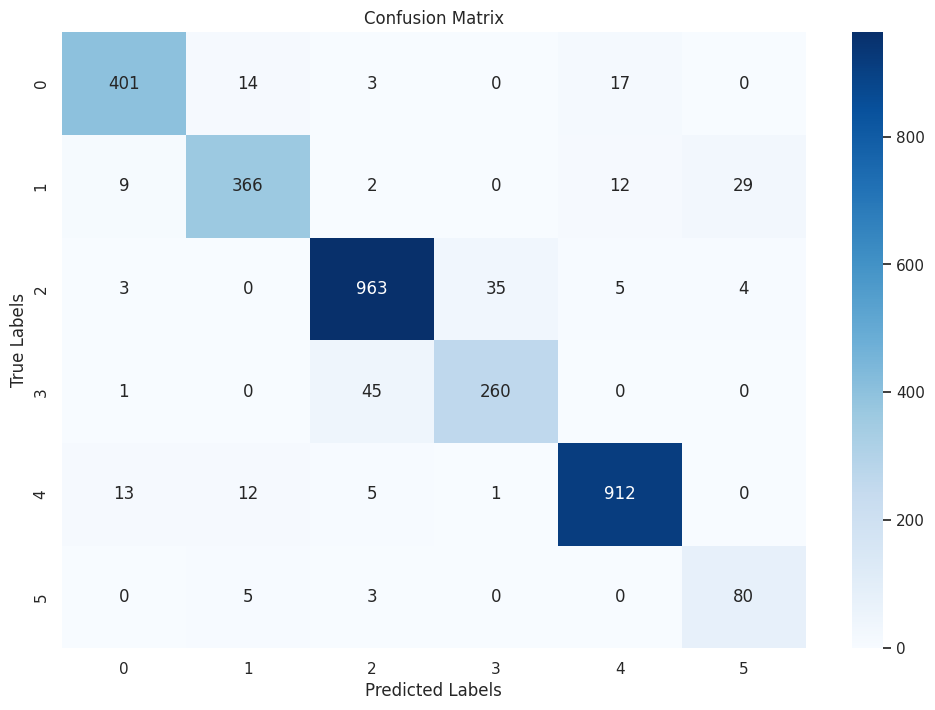

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(cm , annot=True , cmap="Blues" , fmt="d")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

In [ ]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       435
           1       0.92      0.88      0.90       418
           2       0.94      0.95      0.95      1010
           3       0.88      0.85      0.86       306
           4       0.96      0.97      0.97       943
           5       0.71      0.91      0.80        88

    accuracy                           0.93      3200
   macro avg       0.89      0.91      0.90      3200
weighted avg       0.93      0.93      0.93      3200



In [ ]:
accuracy = accuracy_score(y_pred , y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9319


# Test My Model

This code defines a function `detection_text` to predict the emotion of a given text using a fine-tuned DistilBERT model. It then tests the function on a list of sample texts and prints the predicted emotions. Here's a concise breakdown of its functionality:

---

### **Overview of the Code**

1. **Function: `detection_text`**:
   - **Input**: A text string.
   - **Steps**:
     1. **Preprocessing**: Cleans the input text using a `preprocessing` function (not shown in the code).
     2. **Tokenization**: Tokenizes the cleaned text using the loaded tokenizer (`tok`).
     3. **Model Inference**: Passes the tokenized input to the fine-tuned DistilBERT model.
     4. **Prediction**:
        - Extracts the logits (raw model outputs).
        - Converts logits to predicted class using `torch.argmax`.
        - Maps the predicted class to its corresponding emotion label using the `label_encoder`.
   - **Output**: The predicted emotion label.

2. **Sample Texts**:
   - A list of sample texts, each associated with an expected emotion (e.g., joy, sadness, anger).

3. **Testing the Function**:
   - Iterates through the sample texts, predicts their emotions using `detection_text`, and prints the results.

---

### **Key Insights**
- **Purpose**: Predicts the emotion of a given text using a fine-tuned DistilBERT model.
- **Use Case**: Demonstrates how to use the fine-tuned model for inference on new text data.
- **Components**:
  - **Tokenizer**: Converts text into tokenized inputs.
  - **Model**: Generates logits for emotion classification.
  - **Label Encoder**: Maps predicted class indices to emotion labels.

---

### **Example Output**
For the sample texts, the function predicts emotions like:
```
Sentence: I can't stop smiling today, everything feels perfect!
Predicted class: ( joy )

Sentence: Why does everything always go wrong for me?
Predicted class: ( sadness )

Sentence: I can't believe you lied to me!
Predicted class: ( anger )
```

---

### **Next Steps**
- Deploy the `detection_text` function in an application or API for real-time emotion recognition.
- Evaluate the model on a larger dataset to measure its performance.
- Fine-tune the model further or experiment with other architectures for improved accuracy.

This code provides a complete pipeline for emotion recognition using a fine-tuned transformer model.

In [ ]:
def detection_text(text) :
    cleaned_text = preprocessing(text)

    inputs = tok(cleaned_text , return_tensors="pt" , padding=True , truncation=True , max_length=512)
    outputs = model(**inputs)
    logists = outputs.logits  # Purpose: Extracts the logits from the model outputs. Logits are the raw, unnormalized scores for each class before applying softmax.
    pred_classes = torch.argmax(logists , dim=1).item()
    return label_encoder.inverse_transform([pred_classes])[0]



sample_texts = [
    "I can't stop smiling today, everything feels perfect!",  # joy
    "Why does everything always go wrong for me?",  # sadness
    "I can't believe you lied to me!",  # anger
    "I feel so close to you, you're my soulmate.",  # love
    "I'm so nervous about the exam tomorrow.",  # fear
    "That was hilarious! I can't stop laughing.",  # joy
    "I feel so alone and lost.",  # sadness
    "How could they betray my trust like that?",  # anger
    "My heart is racing... I'm so excited for this trip!",  # excitement
    "You mean the world to me.",  # love
    "I’m terrified of what might happen next.",  # fear
    "This place brings me so much peace.",  # joy
    "I feel like crying, nothing is going right today.",  # sadness
    "You always inspire me to be better.",  # love
    "I can't believe how unfair this is!",  # anger
    "I’m so anxious about the results.",  # fear
]


for t in sample_texts :
    pred_classes = detection_text(t)
    print(f"Sentence: {t}\nPredicted class: ( {pred_classes} )\n")


Sentence: I can't stop smiling today, everything feels perfect!
Predicted class: ( joy )

Sentence: Why does everything always go wrong for me?
Predicted class: ( anger )

Sentence: I can't believe you lied to me!
Predicted class: ( anger )

Sentence: I feel so close to you, you're my soulmate.
Predicted class: ( love )

Sentence: I'm so nervous about the exam tomorrow.
Predicted class: ( fear )

Sentence: That was hilarious! I can't stop laughing.
Predicted class: ( surprise )

Sentence: I feel so alone and lost.
Predicted class: ( sadness )

Sentence: How could they betray my trust like that?
Predicted class: ( anger )

Sentence: My heart is racing... I'm so excited for this trip!
Predicted class: ( joy )

Sentence: You mean the world to me.
Predicted class: ( anger )

Sentence: I’m terrified of what might happen next.
Predicted class: ( fear )

Sentence: This place brings me so much peace.
Predicted class: ( joy )

Sentence: I feel like crying, nothing is going right today.
Predicte

# End